# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
### - Import File Data

In [2]:
nama_file = "Data Laporan Praktikum 2.xlsx"
nama_sheet = "KELAS B"

if nama_file.split(".")[-1] == "xlsx":
    if nama_sheet == "-":
        df = pd.read_excel(nama_file)
    else:
        df = pd.read_excel(nama_file,sheet_name=nama_sheet)
elif nama_file.split(".")[-1] == "csv":
    df = pd.read_csv(nama_file)

df.head()

,Y,X1,X2
0,21.56,8.70,327
1,27.55,8.41,385
2,10.04,8.00,382
3,8.84,7.28,217
4,21.69,7.34,609


### - Variabel Independen dan Dependen

In [3]:
variabel_dependen = "Y"

X = df.drop(variabel_dependen,axis=1)
new_X = []
for i in np.arange(0,len(df)):
    new_X.append(X.iloc[i].values.tolist())
X = np.array(new_X)
    
y = np.array(df[variabel_dependen].tolist())

# Analisis Regresi Linier Berganda

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)
y_topi = model.predict(X)
residual = y - y_topi

## a. Uji Asumsi Klasik
### - Uji Linieritas

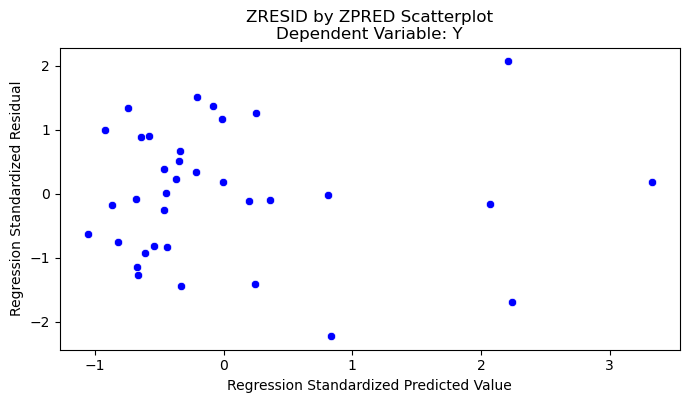

Berdasarkan grafik ZRESID by ZPRED Scatterplot, terlihat plot-plot data tersebar secara acak dan tidak membentuk pola tertentu sehingga dapat disimpulkan bahwa asumsi linieritas terpenuhi secara visual


In [5]:
from sklearn.preprocessing import StandardScaler

def linieritas():
    scaler = StandardScaler()
    zpred = scaler.fit_transform(y_topi.reshape(-1,1))
    zresid = scaler.fit_transform(np.array(residual).reshape(-1,1))
    
    plt.figure(figsize=(8,4),dpi=100)
    sns.scatterplot(data=df,x=np.ravel(zpred),y=np.ravel(zresid),color="b")
    plt.title(f"ZRESID by ZPRED Scatterplot\nDependent Variable: {variabel_dependen}")
    plt.xlabel("Regression Standardized Predicted Value")
    plt.ylabel("Regression Standardized Residual")
    plt.show()

def hasil(x):
    if x == "terpenuhi":
        print("Berdasarkan grafik ZRESID by ZPRED Scatterplot, terlihat plot-plot data tersebar secara acak dan tidak membentuk pola tertentu sehingga dapat disimpulkan bahwa asumsi linieritas terpenuhi secara visual")
    else:
        print("Berdasarkan grafik ZRESID by ZPRED Scatterplot, terlihat plot-plot data tidak tersebar secara acak dan membentuk pola tertentu sehingga dapat disimpulkan bahwa asumsi linieritas tidak terpenuhi secara visual")
        
linieritas()
hasil("terpenuhi")

### - Uji Normalitas

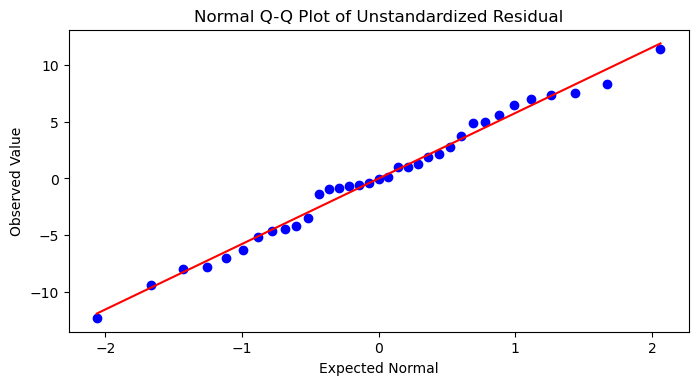

Hipotesis
H₀	: Residual berdistribusi normal
H₁	: Residual tidak berdistribusi normal

Taraf Signifikansi
α = 5%

Statistik Uji
 Statistic  df     Sig.
  0.986422  35 0.934745

Daerah Kritis
H₀ ditolak jika nilai Sig. < α

Keputusan dan Kesimpulan
Pada taraf signifikansi α = 5%, H₀ diterima karena nilai Sig. (0.9347452521324158) > α (0.05) sehingga dapat disimpulkan bahwa residual berdistribusi normal


In [6]:
from scipy.stats import shapiro,probplot

def normalitas():
    fig,ax = plt.subplots(figsize=(8,4),dpi=100)
    probplot(residual,plot=ax)
    plt.title("Normal Q-Q Plot of Unstandardized Residual")
    plt.xlabel("Expected Normal")
    plt.ylabel("Observed Value")
    plt.show()
    
    sw = shapiro(residual)
    tabel_normalitas = pd.DataFrame({"Statistic":sw[0],"df":len(df),"Sig.":sw[1]},
                                    index=[0]).to_string(index=False)
    
    print("\033[1m" + "Hipotesis" + "\033[0m")
    print("H\u2080\t: Residual berdistribusi normal")
    print("H\u2081\t: Residual tidak berdistribusi normal")
    print("")
    print("\033[1m" + "Taraf Signifikansi" + "\033[0m")
    print("α = 5%")
    print("")
    print("\033[1m" + "Statistik Uji" + "\033[0m")
    print(tabel_normalitas)
    print("")
    print("\033[1m" + "Daerah Kritis" + "\033[0m")
    print("H\u2080 ditolak jika nilai Sig. < α")
    print("")
    print("\033[1m" + "Keputusan dan Kesimpulan" + "\033[0m")
    if sw[1] < 0.05:
        keputusan = f"H\u2080 ditolak karena nilai Sig. ({sw[1]}) < α (0.05) sehingga dapat disimpulkan bahwa residual tidak berdistribusi normal"
    else:
        keputusan = f"H\u2080 diterima karena nilai Sig. ({sw[1]}) > α (0.05) sehingga dapat disimpulkan bahwa residual berdistribusi normal"
    print(f"Pada taraf signifikansi α = 5%, {keputusan}")

normalitas()

### - Uji Homoskedastisitas

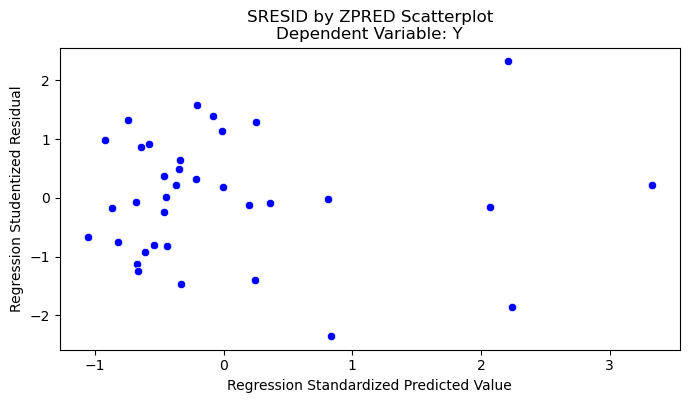

Hipotesis
H₀	: Varian residual homogen
H₁	: Varian residual tidak homogen

Taraf Signifikansi
α = 5%

Statistik Uji
                 t      Sig.
Constant  0.628647  0.534042
X1        0.073021  0.942244
X2        1.029055  0.311170

Daerah Kritis
H₀ ditolak jika nilai Sig. < α

Keputusan dan Kesimpulan
Pada taraf signifikansi α = 5%, diperoleh:
- Nilai t X1 (0.9422441606412145) > α (0.05)
- Nilai t X2 (0.31116966674899665) > α (0.05)
H₀ diterima karena semua nilai Sig. lebih dari α sehingga dapat disimpulkan bahwa varian residual homogen


In [7]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

def homoskedastisitas():
    scaler = StandardScaler()
    zpred = scaler.fit_transform(y_topi.reshape(-1,1))
    student_resid = sm.OLS(y,sm.add_constant(X)).fit().outlier_test()
    sresid = []
    for i in student_resid:
        sresid.append(i[0])

    plt.figure(figsize=(8,4),dpi=100)
    sns.scatterplot(data=df,x=np.ravel(zpred),y=sresid,color="b")
    plt.title(f"SRESID by ZPRED Scatterplot\nDependent Variable: {variabel_dependen}")
    plt.xlabel("Regression Standardized Predicted Value")
    plt.ylabel("Regression Studentized Residual")
    plt.show()
    
    resabs = abs(residual)
    tabel_t = sm.OLS(resabs,sm.add_constant(X)).fit().summary2().tables[1][["t","P>|t|"]]
    tabel_t.index = ["Constant"] + df.drop(variabel_dependen,axis=1).columns.tolist()
    tabel_t.columns = ["t","Sig."]

    print("\033[1m" + "Hipotesis" + "\033[0m")
    print("H\u2080\t: Varian residual homogen")
    print("H\u2081\t: Varian residual tidak homogen")
    print("")
    print("\033[1m" + "Taraf Signifikansi" + "\033[0m")
    print("α = 5%")
    print("")
    print("\033[1m" + "Statistik Uji" + "\033[0m")
    print(tabel_t)
    print("")
    print("\033[1m" + "Daerah Kritis" + "\033[0m")
    print("H\u2080 ditolak jika nilai Sig. < α")
    print("")
    print("\033[1m" + "Keputusan dan Kesimpulan" + "\033[0m")
    print("Pada taraf signifikansi α = 5%, diperoleh:")
    melanggar = 0
    for i,j in zip(df.drop(variabel_dependen,axis=1).columns,tabel_t["Sig."].iloc[1:]):
        if j < 0.05:
            print(f"- Nilai t {i} ({j}) < α (0.05)")
            melanggar += 1
        else:
            print(f"- Nilai t {i} ({j}) > α (0.05)")
    if melanggar > 0:
        print("H\u2080 ditolak karena minimal terdapat satu nilai Sig. kurang dari α sehingga dapat disimpulkan bahwa varian residual tidak homogen")
    else:
        print("H\u2080 diterima karena semua nilai Sig. lebih dari α sehingga dapat disimpulkan bahwa varian residual homogen")
    
homoskedastisitas()

### - Uji Nonautokorelasi

In [8]:
from statsmodels.stats.stattools import durbin_watson

nilai_dL = 1.3433
nilai_dU = 1.5838

def nonautokorelasi(nilai_dL,nilai_dU):
    dl = nilai_dL
    du = nilai_dU
    d = durbin_watson(residual)
    tabel_d = pd.DataFrame({"dL":dl,"dU":du,"Durbin-Watson":d,"4 - dL":4-dl,"4 - dU":4-du},index=[0]).to_string(index=False)
    
    print("\033[1m" + "Hipotesis" + "\033[0m")
    print("H\u2080\t: Tidak terjadi autokorelasi")
    print("H\u2081\t: Terjadi autokorelasi")
    print("")
    print("\033[1m" + "Taraf Signifikansi" + "\033[0m")
    print("α = 5%")
    print("")
    print("\033[1m" + "Statistik Uji" + "\033[0m")
    print(tabel_d)
    print("")
    print("\033[1m" + "Daerah Kritis" + "\033[0m")
    pertama = ["0 < d < dL","dL < d < dU","dU < d < 4 - dU","4 - dU < d < 4 - dL","4 - dL < d < 4"]
    kedua = ["autokorelasi positif","daerah ragu-ragu","tidak terjadi autokorelasi","daerah ragu-ragu","autokorelasi negatif"]
    n = 1
    for i,j in zip(pertama,kedua):
        if n <= 2:
            print(f"- {i}\t\t({j})")
            n += 1
        else:
            print(f"- {i}\t({j})")
    print("")
    print("\033[1m" + "Keputusan dan Kesimpulan" + "\033[0m")
    if du < d < 4-du:
        keputusan = f"H\u2080 diterima karena nilai dU ({du}) < d ({d}) < 4 - dU ({4-du}) sehingga dapat disimpulkan bahwa tidak terjadi autokorelasi"
    elif 0 < d < dl:
        keputusan = f"H\u2080 ditolak karena nilai 0 < d ({d}) < dL ({dl}) sehingga dapat disimpulkan bahwa terjadi autokorelasi positif"
    elif dl < d < du:
        keputusan = f"diperoleh daerah ragu-ragu karena nilai dL ({dl}) < d ({d}) < dU ({du}) sehingga tidak dapat diputuskan dan perlu dilakukan uji lanjut"
    elif 4-du < d < 4-dl:
        keputusan = f"diperoleh daerah ragu-ragu karena nilai 4 - dU ({4-du}) < d ({d}) < 4 - dL ({4-dl}) sehingga tidak dapat diputuskan dan perlu dilakukan uji lanjut"
    else:
        keputusan = f"H\u2080 ditolak karena nilai 4 - dL ({4-dl}) < d ({d}) < 4 sehingga dapat disimpulkan bahwa terjadi autokorelasi negatif"
    print(f"Pada taraf signifikansi α = 5%, {keputusan}")
    
nonautokorelasi(nilai_dL,nilai_dU)

Hipotesis
H₀	: Tidak terjadi autokorelasi
H₁	: Terjadi autokorelasi

Taraf Signifikansi
α = 5%

Statistik Uji
    dL     dU  Durbin-Watson  4 - dL  4 - dU
1.3433 1.5838       2.215595  2.6567  2.4162

Daerah Kritis
- 0 < d < dL		(autokorelasi positif)
- dL < d < dU		(daerah ragu-ragu)
- dU < d < 4 - dU	(tidak terjadi autokorelasi)
- 4 - dU < d < 4 - dL	(daerah ragu-ragu)
- 4 - dL < d < 4	(autokorelasi negatif)

Keputusan dan Kesimpulan
Pada taraf signifikansi α = 5%, H₀ diterima karena nilai dU (1.5838) < d (2.215595047668302) < 4 - dU (2.4162) sehingga dapat disimpulkan bahwa tidak terjadi autokorelasi


### - Uji Nonmultikolinieritas

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def nonmultikolinieritas():
    tabel_vif = df.drop(variabel_dependen,axis=1).assign(Constant=1)
    tabel_vif = pd.DataFrame([variance_inflation_factor(tabel_vif.values,i)
                              for i in range(tabel_vif.shape[1])],index=tabel_vif.columns).iloc[:-1]
    tabel_vif.columns = ["VIF"]
    
    print("\033[1m" + "Hipotesis" + "\033[0m")
    print("H\u2080\t: Tidak terjadi multikolinieritas")
    print("H\u2081\t: Terjadi multikolinieritas")
    print("")
    print("\033[1m" + "Taraf Signifikansi" + "\033[0m")
    print("α = 5%")
    print("")
    print("\033[1m" + "Statistik Uji" + "\033[0m")
    print(tabel_vif)
    print("")
    print("\033[1m" + "Daerah Kritis" + "\033[0m")
    print("H\u2080 ditolak jika nilai VIF > 10")
    print("")
    print("\033[1m" + "Keputusan dan Kesimpulan" + "\033[0m")
    print("Pada taraf signifikansi α = 5%, diperoleh:")
    melanggar = 0
    for i,j in zip(df.drop(variabel_dependen,axis=1).columns,tabel_vif["VIF"].tolist()):
        if j < 10:
            print(f"- Nilai VIF {i} ({j}) < 10")
        else:
            print(f"- Nilai VIF {i} ({j}) > 10")
            melanggar += 1
    if melanggar > 0:
        print("H\u2080 ditolak karena minimal terdapat satu nilai VIF lebih dari 10 sehingga dapat disimpulkan bahwa terjadi multikolinieritas")
    else:
        print("H\u2080 diterima karena semua nilai VIF kurang dari 10 sehingga dapat disimpulkan bahwa tidak terjadi multikolinieritas")
    
nonmultikolinieritas()

Hipotesis
H₀	: Tidak terjadi multikolinieritas
H₁	: Terjadi multikolinieritas

Taraf Signifikansi
α = 5%

Statistik Uji
         VIF
X1  1.106742
X2  1.106742

Daerah Kritis
H₀ ditolak jika nilai VIF > 10

Keputusan dan Kesimpulan
Pada taraf signifikansi α = 5%, diperoleh:
- Nilai VIF X1 (1.1067418085824252) < 10
- Nilai VIF X2 (1.1067418085824257) < 10
H₀ diterima karena semua nilai VIF kurang dari 10 sehingga dapat disimpulkan bahwa tidak terjadi multikolinieritas


## b. Uji Goodness of Fit
### - Uji F

In [10]:
def uji_F():
    F = float(sm.OLS(y,sm.add_constant(X)).fit().summary2().tables[0][3].iloc[4])
    F_sig = float(sm.OLS(y,sm.add_constant(X)).fit().summary2().tables[0][3].iloc[5])
    tabel_F = pd.DataFrame({"F":F,"Sig.":F_sig},index=[0]).to_string(index=False)

    print("\033[1m" + "Hipotesis" + "\033[0m")
    print("H\u2080\t: Model regresi tidak sesuai")
    print("H\u2081\t: Model regresi sesuai")
    print("")
    print("\033[1m" + "Taraf Signifikansi" + "\033[0m")
    print("α = 5%")
    print("")
    print("\033[1m" + "Statistik Uji" + "\033[0m")
    print(tabel_F)
    print("")
    print("\033[1m" + "Daerah Kritis" + "\033[0m")
    print("H\u2080 ditolak jika nilai Sig. < α")
    print("")
    print("\033[1m" + "Keputusan dan Kesimpulan" + "\033[0m")
    if F_sig < 0.05:
        keputusan = f"H\u2080 ditolak karena nilai Sig. ({F_sig}) < α (0.05) sehingga dapat disimpulkan bahwa model regresi sesuai"
    else:
        keputusan = f"H\u2080 diterima karena nilai Sig. ({F_sig}) > α (0.05) sehingga dapat disimpulkan bahwa model regresi tidak sesuai"
    print(f"Pada taraf signifikansi α = 5%, {keputusan}")

uji_F()

Hipotesis
H₀	: Model regresi tidak sesuai
H₁	: Model regresi sesuai

Taraf Signifikansi
α = 5%

Statistik Uji
    F         Sig.
31.99 2.330000e-08

Daerah Kritis
H₀ ditolak jika nilai Sig. < α

Keputusan dan Kesimpulan
Pada taraf signifikansi α = 5%, H₀ ditolak karena nilai Sig. (2.33e-08) < α (0.05) sehingga dapat disimpulkan bahwa model regresi sesuai


### - Uji t

In [11]:
def uji_t():
    tabel_t = sm.OLS(y,sm.add_constant(X)).fit().summary2().tables[1][["t","P>|t|"]]
    tabel_t.index = ["Constant"] + df.drop(variabel_dependen,axis=1).columns.tolist()
    tabel_t.columns = ["t","Sig."]

    print("\033[1m" + "Hipotesis" + "\033[0m")
    print("H\u2080\t: Variabel independen tidak berpengaruh signifikan terhadap variabel dependen")
    print("H\u2081\t: Variabel independen berpengaruh signifikan terhadap variabel dependen")
    print("")
    print("\033[1m" + "Taraf Signifikansi" + "\033[0m")
    print("α = 5%")
    print("")
    print("\033[1m" + "Statistik Uji" + "\033[0m")
    print(tabel_t)
    print("")
    print("\033[1m" + "Daerah Kritis" + "\033[0m")
    print("H\u2080 ditolak jika nilai Sig. < α")
    print("")
    print("\033[1m" + "Keputusan dan Kesimpulan" + "\033[0m")
    print("Pada taraf signifikansi α = 5%, diketahui:")
    for i,j in zip(tabel_t.index[1:],tabel_t["Sig."][1:]):
        if j < 0.05:
            print(f"- H\u2080 ditolak untuk variabel {i} karena nilai Sig. ({j}) < α (0.05)")
            print(f"  sehingga berpengaruh signifikan terhadap variabel {variabel_dependen}")
        else:
            print(f"- H\u2080 diterima untuk variabel {i} karena nilai Sig. ({j}) > α (0.05)")
            print(f"  sehingga tidak berpengaruh signifikan terhadap variabel {variabel_dependen}")
    
uji_t()

Hipotesis
H₀	: Variabel independen tidak berpengaruh signifikan terhadap variabel dependen
H₁	: Variabel independen berpengaruh signifikan terhadap variabel dependen

Taraf Signifikansi
α = 5%

Statistik Uji
                 t          Sig.
Constant -4.322173  1.405396e-04
X1        6.413065  3.300726e-07
X2        2.553190  1.564287e-02

Daerah Kritis
H₀ ditolak jika nilai Sig. < α

Keputusan dan Kesimpulan
Pada taraf signifikansi α = 5%, diketahui:
- H₀ ditolak untuk variabel X1 karena nilai Sig. (3.300726291023008e-07) < α (0.05)
  sehingga berpengaruh signifikan terhadap variabel Y
- H₀ ditolak untuk variabel X2 karena nilai Sig. (0.01564287243878905) < α (0.05)
  sehingga berpengaruh signifikan terhadap variabel Y


### - Koefisien Determinasi

In [12]:
from sklearn.metrics import r2_score

def koef_deter():
    r2 = r2_score(y,y_topi)
    adj_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
    r = np.sqrt(r2)

    tabel_R = pd.DataFrame({"R":r,"R-Squared":r2,"Adjusted R-Squared":adj_r2},index=[0]).to_string(index=False)

    var = []
    variabel = df.drop(variabel_dependen,axis=1).columns.tolist()
    if len(variabel) == 2:
        var.append(f"{variabel[0]} dan {variabel[1]}")
    else:
        for i in variabel:
            var.append(f"{i}, ")
        var[-1] = f"dan {variabel[-1]}"
        var = [''.join(var[0:])]

    print(tabel_R,"\n")
    print(f"Berdasarkan tabel di atas, diperoleh nilai koefisien determinasi sebesar {r2} yang artinya sebesar {r2*100}% variabel {variabel_dependen} dipengaruhi oleh variabel {var[0]}, sedangkan sisanya sebesar {100-(r2*100)}% variabel {variabel_dependen} dipengaruhi oleh faktor-faktor lainnya")
    
koef_deter()

      R  R-Squared  Adjusted R-Squared
0.81647   0.666624            0.645788 

Berdasarkan tabel di atas, diperoleh nilai koefisien determinasi sebesar 0.6666237372410468 yang artinya sebesar 66.66237372410468% variabel Y dipengaruhi oleh variabel X1 dan X2, sedangkan sisanya sebesar 33.33762627589532% variabel Y dipengaruhi oleh faktor-faktor lainnya


## c. Model Regresi

In [13]:
def model_regresi():
    variabel = ["Constant"] + df.drop(variabel_dependen,axis=1).columns.tolist()
    coef = [model.intercept_] + model.coef_.tolist()
    tabel_coef = pd.DataFrame({"":variabel,"Unstandardized Coefficients":coef}).to_string(index=False)
    
    persamaan_regresi = [f"{variabel_dependen} = " + str(model.intercept_)]
    for i, j in zip(model.coef_.tolist(),df.drop(variabel_dependen,axis=1).columns.tolist()):
        i = str(i)
        if i[0] == "-":
            i = i[1:]
            persamaan_regresi.append(" - " + i + "(" + j + ")")
        else:
            persamaan_regresi.append(" + " + i + "(" + j + ")")
    persamaan_regresi = [''.join(persamaan_regresi[0:])]
    
    print(tabel_coef)
    print()
    print("Berdasarkan tabel di atas, diperoleh model regresi sebagai berikut:")
    print(persamaan_regresi[0])
    
model_regresi()

          Unstandardized Coefficients
Constant                   -25.040942
      X1                     4.731635
      X2                     0.013565

Berdasarkan tabel di atas, diperoleh model regresi sebagai berikut:
Y = -25.040941789552452 + 4.731635371060043(X1) + 0.013564677330242808(X2)
